In [ ]:
import os
import numpy as np
from scipy.signal import find_peaks
import matplotlib as mpl
import matplotlib.pyplot as plt
# plt.style.use("opinionated_m")
# import colormaps as cmaps
# mpl.rcParams['font.size'] = 16

In [16]:
class Visualization:
    ''' 
    My implementation for visualize PPG signals. 
    Note that all signals should be 1D (-1)
    '''
    def __init__(self, cfgs=None):
        self.cfgs = cfgs

    def plot_one_signal(self, signal):
        '''
        This is for visualize 1 signal.
        '''
        plt.figure(figsize=(10, 6))
        plt.plot(signal, label="Signal", color='blue')
        plt.legend()
        plt.title("Signal")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.show()

    def plot_two_signal(self, src_ppg_signal, ref_ppg_signal):
        '''
        This is for visualize 2 signals, including source and ground_truth signal.
        '''
        assert len(src_ppg_signal) == len(ref_ppg_signal)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        ax1.plot(src_ppg_signal)
        ax1.set_title("Source Signal")
        ax1.set_xlabel("Sample")
        ax1.set_ylabel("Amplitude")

        ax2.plot(ref_ppg_signal)
        ax2.set_title("Reference Signal")
        ax2.set_xlabel("Sample")
        ax2.set_ylabel("Amplitude")
        plt.tight_layout()
        plt.show()
    
    def plot_three_signals(self, src_ppg_signal, out_ppg_signal, ref_ppg_signal, ppg_label=None):
        '''
        This is for visualize 3 signals, including source, prediction, ground_truth signal. 
        `ppg_label` is the ppg type of source signal
        '''
        assert len(src_ppg_signal) == len(ref_ppg_signal) == len(out_ppg_signal)

        fig, axes = plt.subplots(1, 3, figsize=(12, 6))

        axes[0].plot(src_ppg_signal)
        axes[0].set_title("Source Signal")
        axes[0].set_xlabel("Sample")
        axes[0].set_ylabel("Amplitude")

        axes[1].plot(out_ppg_signal)
        axes[1].set_title("Output Signal")
        axes[1].set_xlabel("Sample")
        axes[1].set_ylabel("Amplitude")

        axes[2].plot(ref_ppg_signal)
        axes[2].set_title("Reference Signal")
        axes[2].set_xlabel("Sample")
        axes[2].set_ylabel("Amplitude")

        if ppg_label is not None:
            fig.suptitle(ppg_label)
        plt.tight_layout()  
        plt.show()

    def plot_five_signals(self, signals):
        '''
        This is for visualize 5 signals in 5 different classes ['2E', '1L', '2L', '1', '3']
        '''


        fig, axes = plt.subplots(1, 5, figsize=(12, 4))

        axes[0].plot(signals[0])
        axes[0].set_title("2E")
        axes[0].axis('off')  # Turn off both x and y axes

        axes[1].plot(signals[1])
        axes[1].set_title("1L")
        axes[1].axis('off')  # Turn off both x and y axes

        axes[2].plot(signals[2])
        axes[2].set_title("2L")
        axes[2].axis('off')  # Turn off both x and y axes

        axes[3].plot(signals[3])
        axes[3].set_title("1")
        axes[3].axis('off')  # Turn off both x and y axes

        axes[4].plot(signals[4])
        axes[4].set_title("3")
        axes[4].axis('off')  # Turn off both x and y axes

        plt.tight_layout()  
        plt.show()

    def plot_peaks(self, signal):
        '''
        This is for visualize the peaks and notches of a signal!
        '''

        peaks, _ = find_peaks(signal)
        notches, _ = find_peaks(-signal)  
        filtered_notches = [notch for notch in notches if peaks[0] < notch < peaks[1]]
        
        plt.figure(figsize=(10, 6))
        plt.plot(signal, label="Signal", color='blue')
        plt.plot(peaks[:2], signal[peaks[:2]], "x", label="Peaks", color='red')
        plt.plot(filtered_notches, signal[filtered_notches], "o", label="Notches", color='green')
        plt.legend()
        plt.title("Signal with Peaks and Notches")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()

    def plot_metrics(self, signal1, signal2):
        '''
        This is for visualize the difference between 2 signals!
        '''
        def find_relevant_points(signal):
            peaks, _ = find_peaks(signal)
            notches, _ = find_peaks(-signal)
            
            peak1, peak2 = peaks[:2]
            relevant_notch = notches[(notches > peak1) & (notches < peak2)][0]

            plt.scatter([peak1, peak2], [signal[peak1], signal[peak2]], color='brown')
            plt.scatter(relevant_notch, signal[relevant_notch], color='pink', marker='x')

            plt.plot([peak1, peak1], [0, signal[peak1]], color='blue', linestyle='--')
            plt.plot([relevant_notch, relevant_notch], [0, signal[relevant_notch]], color='red', linestyle='--')
            plt.plot([peak2, peak2], [0, signal[peak2]], color='orange', linestyle='--')

            plt.plot([peak1, 0], [signal[peak1], signal[peak1]], color='blue', linestyle='--')
            plt.plot([relevant_notch, 0], [signal[relevant_notch], signal[relevant_notch]], color='red', linestyle='--')
            plt.plot([peak2, 0], [signal[peak2], signal[peak2]], color='orange', linestyle='--')

        plt.figure(figsize=(10, 6))
        plt.plot(signal1, label="Signal 1", color='green')
        plt.plot(signal2, label="Signal 2", color='purple')
        
        find_relevant_points(signal1)
        find_relevant_points(signal2)

        plt.legend()
        plt.title("Comparison of Two Signals based on Peaks and Notches")
        plt.xlabel('Time Steps')
        plt.ylabel('Amplitudes')
        plt.show()

    def plot_all_results(self, path_to_storage=".."):
        '''
        This is the main function: draw 5x3 figure, given path to a folder that contains all numpy files
        One numpy file here is defined as stack of 3 signals ['Input Signal', 'Reconstructed Signal', 'Ground Truth'], then shape (128,3)
        '''
        row_names = ['2E', '1L', '2L', '1', '3']
        col_names = ['Input Signal', 'Reconstructed Signal', 'Ground Truth']
        fig, axs = plt.subplots(5, 3, figsize=(15, 20))

        for i, row_name in enumerate(row_names):
            for j, col_name in enumerate(col_names):
                signal = np.load(os.path.join(path_to_storage, f'{row_name}.npy'))
                axs[i, j].plot(signal[:,j])

        for i, row_name in enumerate(row_names):
            axs[i, 0].set_ylabel(row_name + "     ", rotation=0, size="x-large")

        for j, col_name in enumerate(col_names):
            axs[0, j].set_title(col_name)

        plt.tight_layout()
        plt.subplots_adjust(left=0.2, hspace=0.2, wspace=0.2)
        plt.show()

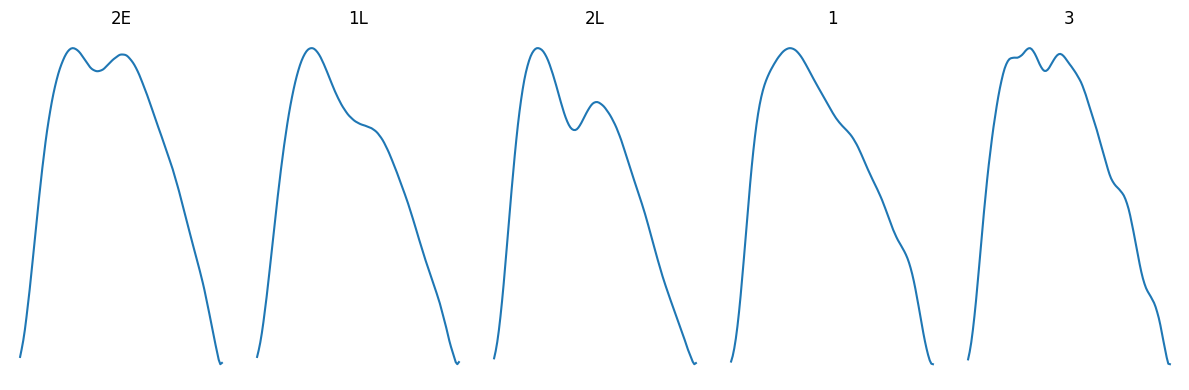

In [19]:
viz_tool = Visualization()
# results = np.load('waveform_types/2L.npy')
# viz_tool.plot_three_signals(results[:,0].reshape(-1),results[:,1].reshape(-1),results[:,2].reshape(-1))
# viz_tool.plot_all_results(path_to_storage=".")
signals = []
for type_ in ['2E', '1L', '2L', '1', '3']:
    signals.append(np.load(os.path.join(".", f'../../../assets/results/{type_}.npy'))[:,0].reshape(-1))

viz_tool.plot_five_signals(signals)